# Projeto 1


0) Declarando biblliotecas: 

In [19]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

'''
listar os arquivos presentes em Projeto1
''' 
print("Arquivos no diretório atual:") 
print(os.listdir())

Arquivos no diretório atual:
['P1.png', 'P2.png', 'P3.jpg', 'P4.png', 'prjt1.ipynb']


1. Juntando todas as 4 imagens em uma só (em um formato 2x2)

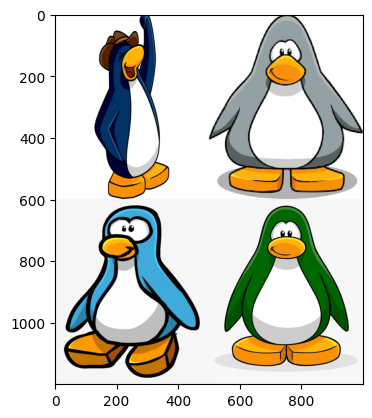

In [20]:
def junta_imagens(imgs):
    # redimensionando as imagens para mesmo tamanho (600x500)
    imagens = [Image.open(caminho).resize((500, 600)) for caminho in imgs]
    
    # cria duas linhas, ambas com capacidade de 1000 de largura (2 imagens de 500) e 600 de altura
    # em seguida, armazena imagens na respectiva linha
    linha1 = Image.new("RGB", (1000, 600)) 
    linha1.paste(imagens[0], (0, 0))
    linha1.paste(imagens[1], (500, 0))
    
    linha2 = Image.new("RGB", (1000, 600))
    linha2.paste(imagens[2], (0, 0))
    linha2.paste(imagens[3], (500, 0))

    # imagem nova com dimensão total (1200x1000)
    juncao = Image.new("RGB", (1000, 1200))  
    juncao.paste(linha1, (0, 0))
    juncao.paste(linha2, (0, 600))

    return juncao

# indicando imagens para função
imgs = ["P1.png", "P2.png", "P3.jpg", "P4.png"]
imagem_junta = junta_imagens(imgs)
# mostra resultado
plt.imshow(imagem_junta)

2) Trocando a cor da imagem (dos pinguin) para rosa

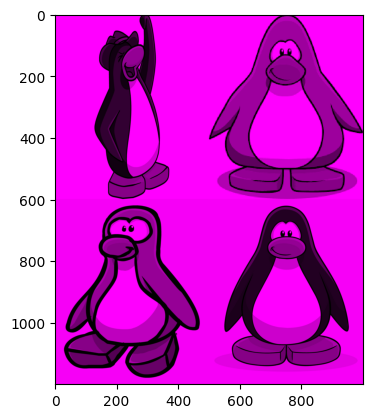

In [21]:
def mudar_cor(img):
    # convertendo imagem para array (alt, larg, canais)
    img_np = np.array(img)

    grayscale = np.average(img_np, axis=2)
    # nova imagem preta com mesmas dimensões
    tinted = np.zeros_like(img_np, dtype=np.uint8)

    tinted[:, :, 0] = grayscale * (255 / 255)    # canal R vermelho no máximo
    tinted[:, :, 1] = grayscale * (0 / 255)      # canal G verde no mínimo
    tinted[:, :, 2] = grayscale * (255 / 255)    # canal B azul no máximo

    return tinted

imagem_com_cor = mudar_cor(imagem_junta)
plt.imshow(imagem_com_cor)

3) Espelhamento em x e y

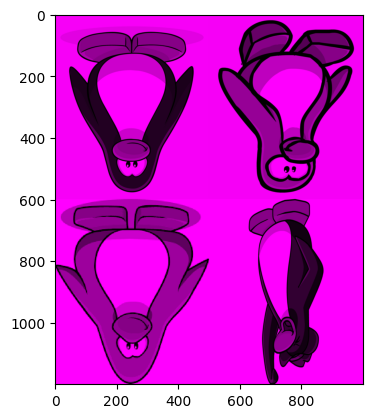

In [22]:
def espelhar(img, eixo):
    refl = np.zeros_like(img, dtype=np.uint8)
    if (eixo == 0): # espelha em y
        refl[::-1, :, :] = img
    elif (eixo == 1): # espelha em x
        refl[:, ::-1, :] = img
    else: # espelha em ambos os eixos
        refl[::-1, ::-1, :] = img   

    return refl

imagem_esp = espelhar(imagem_com_cor,2) # espelhada em x e y
plt.imshow(imagem_esp)

4) Recortar um dos pinguins ("P1.png")

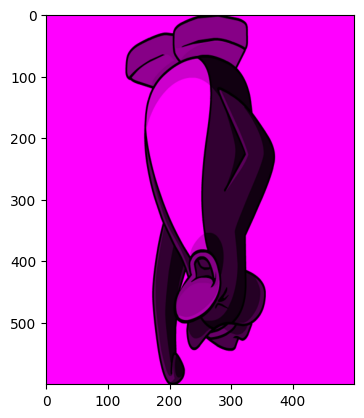

In [23]:
def recortar(img):
    # definindo limites da imagem do pinguim escolhido
    (img_start_x, img_start_y, img_end_x, img_end_y) = (500, 600, 1000, 1200)
    
    # definindo as dimensões da "imagem nova"
    altura = img_end_y - img_start_y
    largura = img_end_x - img_start_x
    crop = np.zeros((altura, largura, 3), dtype=np.uint8)

    # preenchendo os pixels com recorte selecionado
    for i in range (altura):
        for j in range (largura):
            crop[i,j]=img[img_start_y + i, img_start_x + j]

    return crop        


imagem_recort = recortar(imagem_esp)
plt.imshow(imagem_recort)


5) Análise do histograma e escolha do threshold

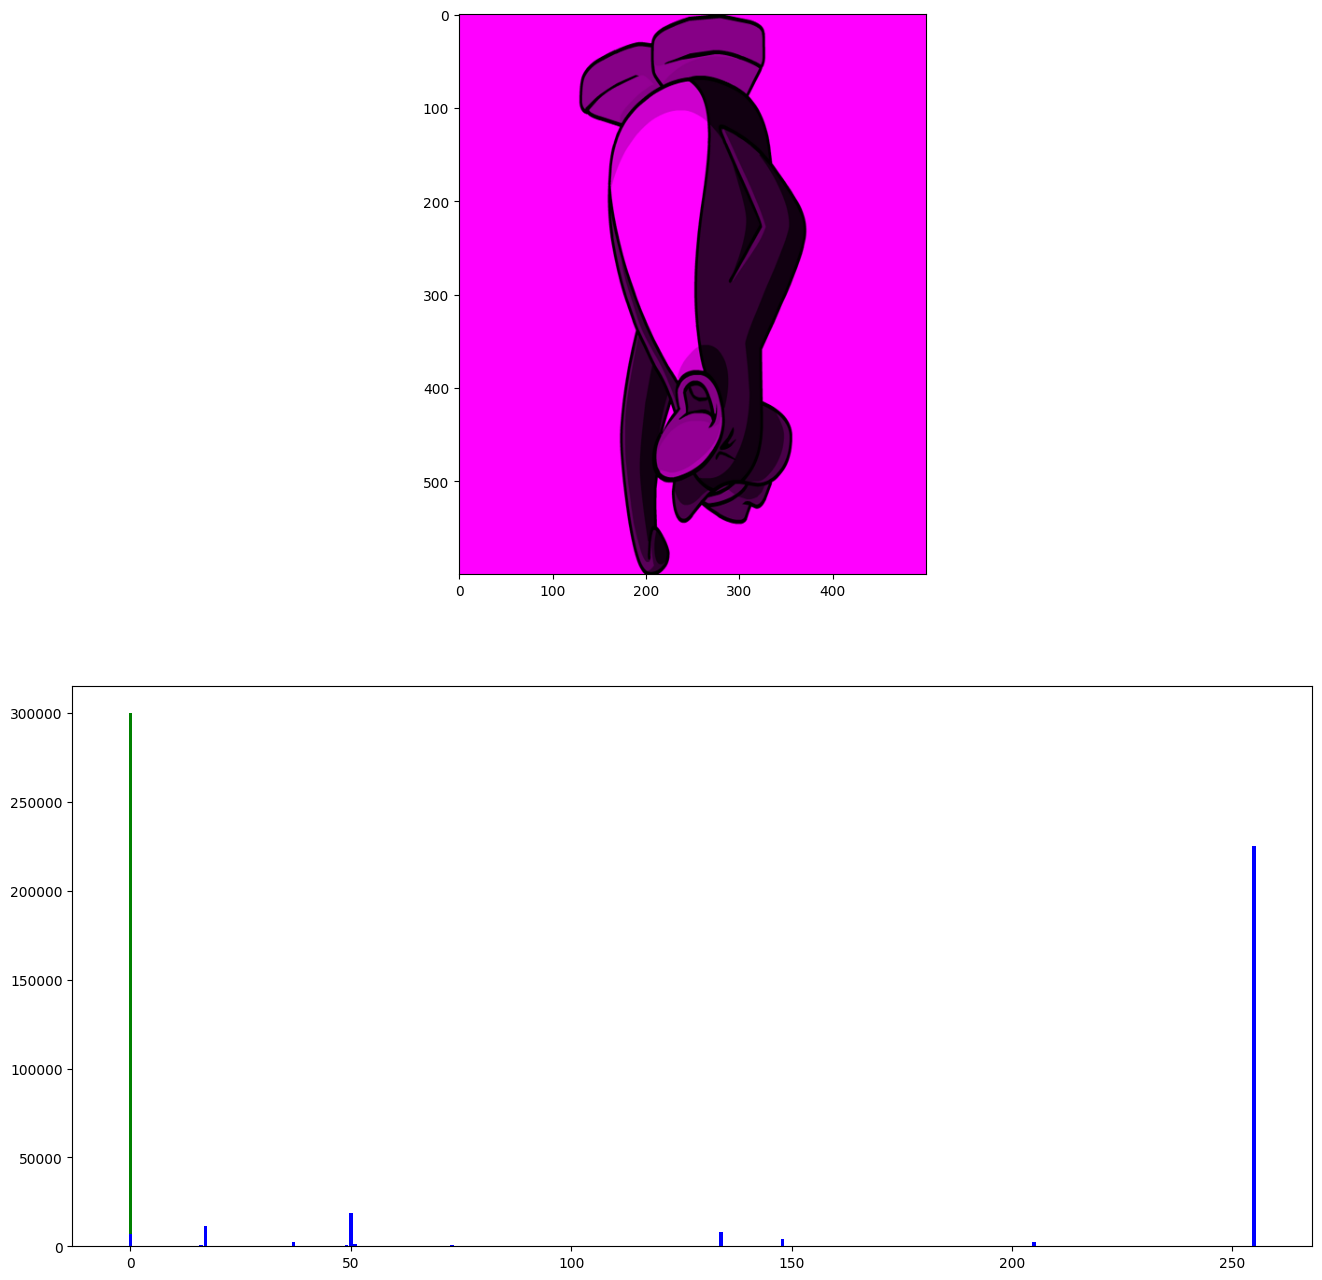

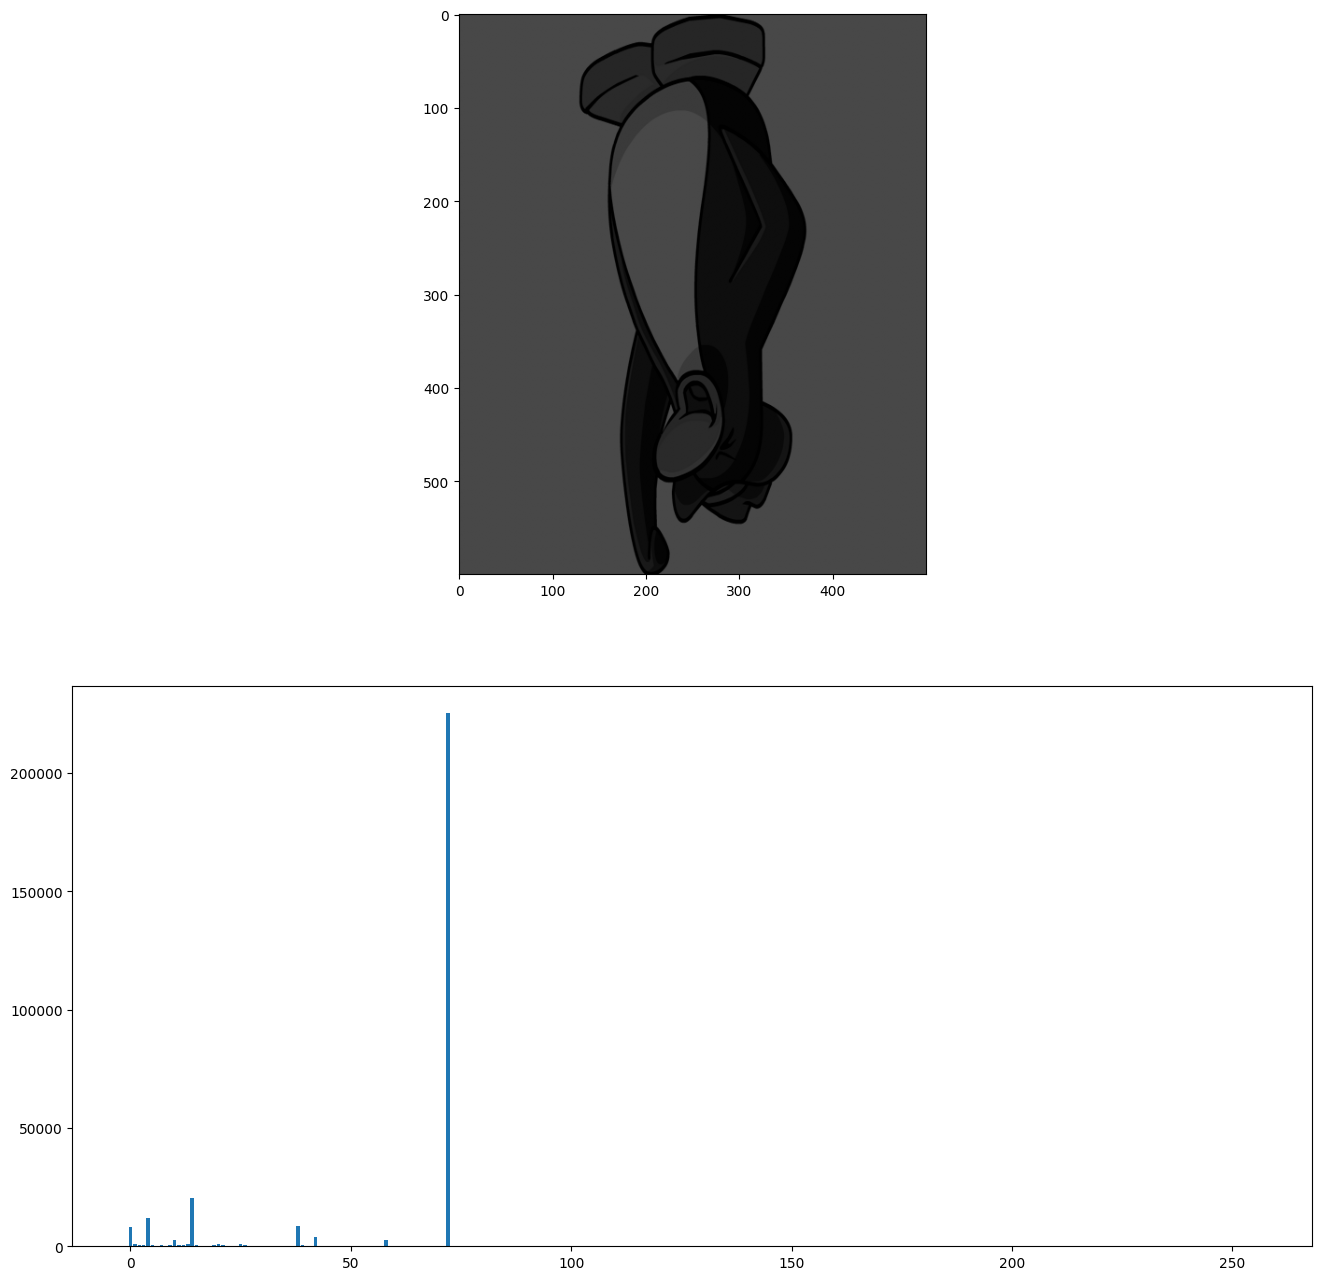

In [24]:
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')


def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

# histograma da imagem colorida
show_histogram(imagem_recort)

# histograma da imagem em escala de cinza
conv = ((0.2126 * imagem_recort[:, :, 0]) + (0.7152 * imagem_recort[:, :, 1]) + (0.0722 * imagem_recort[:, :, 2])).astype(np.uint8)
show_histogram_gray(conv)

- Conclusão sobre threshold: Sabendo que a imagem é predominantemente escura (valores mais próximos de 0), dado que a horizontal representa a gama de cores existentes (0 a 255), onde há maior quantidade de pixels é entre 70-80. Ao aplicar o conceito de threshold, um limite próximo desse substituiria bastante pixel.

6) Conversão para que todos os pixels sejam pintados de uma cor (amarelo)

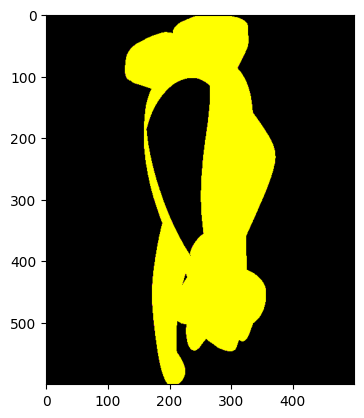

In [29]:
def threshold(img, limiar):
    img_modificada = img.copy()

    # converte para escala cinza
    img_gray = (0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]).astype(np.uint8)

    # valores menores que o limite de threshold definido são identificados
    mascara = img_gray < limiar
    # pixel amarelo onde a máscara for identificada
    img_modificada[mascara] = [255, 255, 0]

    # valores maiores que o limite de threshold definido são identificados
    nomascara = img_gray > limiar
    # pixel preto onde não tiver masc
    img_modificada[nomascara] = [0, 0, 0]

    return img_modificada

imagem_amarela = threshold(imagem_recort,70)

# mostrar
plt.imshow(imagem_amarela)
plt.show()